#AI Knowledge Graph Builder for Enterprise Intelligence

#ISRO Mission Navigator

##Module 1: Data Injection & Preprocessing

1.   Data Cleaning
2.   Data Validation
1.   Data Transformation
2.   Data Filtering
1.   Data Enrichment
2.   Data Deduplication
1.   Data Masking & Security
2.   Data Standardization
1.   Error Handling & Logging
2.   Metadata Handling
1.   Sampling (Optional)


##Data Ingestion and Preprocessing for ISRO Satellite Mission Dataset

In [72]:
# Install and import required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [73]:
# Upload file(.csv) in Colab from the Computer
#from google.colab import files
#uploaded = files.upload()
# Select the CSV file from your computer

# Upload the file manually
df = pd.read_csv('/content/ISRO_Satellite_List.csv', encoding='latin1')

#Showing the data in .csv file
df

,SL No,Satellite Name,Launch Date,Launch Vehicle,Orbit,Application,Remarks
0,130,NISAR(NASA-ISRO),30-Jul-25,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful
1,129,EOS-09,18-May-25,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful
2,128,NVS-02(NavIC Series),29-Jan-25,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful
3,127,"SPADEX, POEM-4",30-Dec-25,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful
4,126,Proba-3 (ESA),05-Dec-24,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful
...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,31-May-81,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful
126,4,Rohini Satellite RS-1,18-Jul-80,SLV-3E2,NaN,NaN,Launch successful
127,3,Rohini Technology Payload (RTP),10-Aug-79,SLV-3E1,NaN,NaN,Launch unsuccessful
128,2,Bhaskara-I,07-Jun-79,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful


In [74]:
print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")

Dataset loaded: 130 rows, 7 columns


### METHOD 1: DATA CLEANING
####Purpose: Remove bad data, fix missing values, remove duplicates

STEP 1: Perform & Display Basic Operation

In [75]:
# To check the Number of rows and Column present in the Data sheet by using 'shape function'
df.shape

#OR
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")

Total rows: 130
Total columns: 7


In [76]:
# View the first 5 entries from the datasets
print("Five Entries from Beginning: ")
print("=" * 80)

df.head(5)

Five Entries from Beginning: 


,SL No,Satellite Name,Launch Date,Launch Vehicle,Orbit,Application,Remarks
0,130,NISAR(NASA-ISRO),30-Jul-25,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful
1,129,EOS-09,18-May-25,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful
2,128,NVS-02(NavIC Series),29-Jan-25,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful
3,127,"SPADEX, POEM-4",30-Dec-25,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful
4,126,Proba-3 (ESA),05-Dec-24,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful


In [77]:
# View the last 5 entries from the datasets
print("Five Entries from Ending:")
print("=" * 80)

df.tail(5)

Five Entries from Ending:


,SL No,Satellite Name,Launch Date,Launch Vehicle,Orbit,Application,Remarks
125,5,Rohini Satellite RS-D1,31-May-81,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful
126,4,Rohini Satellite RS-1,18-Jul-80,SLV-3E2,NaN,NaN,Launch successful
127,3,Rohini Technology Payload (RTP),10-Aug-79,SLV-3E1,NaN,NaN,Launch unsuccessful
128,2,Bhaskara-I,07-Jun-79,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful
129,1,Aryabhata,19-Apr-75,C-1 Intercosmos,NaN,Experimental,Launch successful


In [78]:
# Information regarding datasets (Including Rows, Columns, Datatypes, Counts of sections)
print("Basic Information: ")
print("=" * 80)

df.info()
print()

#Print Datatypes
print(f"\nData types:\n{df.dtypes}")

Basic Information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   SL No           130 non-null    int64 
 1   Satellite Name  130 non-null    object
 2   Launch Date     130 non-null    object
 3   Launch Vehicle  130 non-null    object
 4   Orbit           109 non-null    object
 5   Application     126 non-null    object
 6   Remarks         130 non-null    object
dtypes: int64(1), object(6)
memory usage: 7.2+ KB


Data types:
SL No              int64
Satellite Name    object
Launch Date       object
Launch Vehicle    object
Orbit             object
Application       object
Remarks           object
dtype: object


In [79]:
# Counting number of same values under each catergoies i.e Gender category (Male & females)
print(df['Launch Vehicle'].value_counts())      #Data for launch vehicles rockets
print()
print("=" * 80)

print(df['Orbit'].value_counts())          #Data for Type of Orbit i.e LEO, MEO, HEO
print()
print("=" * 80)

print(df['Application'].value_counts())        #Data for Purpose to launch it
print()
print("=" * 80)

print(df['Remarks'].value_counts())       #Data for Status
print()
print("=" * 80)

Launch Vehicle
PSLV-C54/EOS-06 Mission                         5
PSLV-C40/Cartosat-2 Series Satellite Mission    3
PSLV-C37 / Cartosat -2 Series Satellite         3
PSLV-C52/EOS-04 Mission                         2
C-1 Intercosmos                                 2
                                               ..
Ariane -1(V-3)                                  1
SLV-3D1                                         1
SLV-3E2                                         1
SLV-3E1                                         1
C-1Intercosmos                                  1
Name: count, Length: 114, dtype: int64

Orbit
GSO (Geosynchronous Orbit)             42
SSPO (Sun Synchronous Polar Orbit)     37
LEO (Low Earth Orbit)                   9
GTO (Geosynchronous Transfer Orbit)     7
GEO                                     6
Lunar                                   4
SSO (Sun Synchronous Orbit)             2
HEO(High Elliptical Orbit)              1
Martian                                 1
Name: count

STEP 2: Handle Missing Values

In [80]:
# To count the null or missingh values in the datasets under each COLUMN
print("Missing values count from each Column:")
print("=" * 80)

df.isna().sum()


Missing values count from each Column:


,0
SL No,0
Satellite Name,0
Launch Date,0
Launch Vehicle,0
Orbit,21
Application,4
Remarks,0


In [81]:
# To check any null value(missing value) present in datasets
# It shows boolean values as: true(as null value present) and false(as no null value is present)
df.isna()

,SL No,Satellite Name,Launch Date,Launch Vehicle,Orbit,Application,Remarks
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
125,False,False,False,False,False,False,False
126,False,False,False,False,True,True,False
127,False,False,False,False,True,True,False
128,False,False,False,False,False,False,False


In [82]:
# Fill missing text columns with "Unknown"
text_cols = df.select_dtypes(include=['object']).columns
for col in text_cols:
    if df[col].isna().sum() > 0:
        df[col].fillna('Unknown', inplace=True)
        print(f"Filled {col}: {df[col].isnull().sum()} remaining missing")


Filled Orbit: 0 remaining missing
Filled Application: 0 remaining missing


/tmp/ipython-input-711535778.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


In [83]:
df

,SL No,Satellite Name,Launch Date,Launch Vehicle,Orbit,Application,Remarks
0,130,NISAR(NASA-ISRO),30-Jul-25,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful
1,129,EOS-09,18-May-25,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful
2,128,NVS-02(NavIC Series),29-Jan-25,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful
3,127,"SPADEX, POEM-4",30-Dec-25,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful
4,126,Proba-3 (ESA),05-Dec-24,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful
...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,31-May-81,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful
126,4,Rohini Satellite RS-1,18-Jul-80,SLV-3E2,Unknown,Unknown,Launch successful
127,3,Rohini Technology Payload (RTP),10-Aug-79,SLV-3E1,Unknown,Unknown,Launch unsuccessful
128,2,Bhaskara-I,07-Jun-79,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful


STEP 3: Remove Duplicates

In [84]:
#Checking for duplicates values in the datasets
print("REMOVING DUPLICATE RECORDS:")
print("=" * 80)

dup_count = df.duplicated().sum()
print(f"Found {dup_count} exact duplicate rows")
df = df.drop_duplicates()
print(f"After removing duplicates: {len(df)} rows")


REMOVING DUPLICATE RECORDS:
Found 0 exact duplicate rows
After removing duplicates: 130 rows


STEP 4: Standardize Column Names

In [85]:
# Rename the Column Names in Standard formats
print("STANDARDIZING COLUMN NAMES:")
print("=" * 80)

df.columns = df.columns.str.lower().str.replace(' ', '_')
print(f"✓ Standardized names:\n{list(df.columns)}")
print("=" * 80)


STANDARDIZING COLUMN NAMES:
✓ Standardized names:
['sl_no', 'satellite_name', 'launch_date', 'launch_vehicle', 'orbit', 'application', 'remarks']


STEP 5: Remove Invalid Values

In [86]:
df['satellite_name'] = df['satellite_name'].str.strip()
print("Cleaned Satellite Name examples:", df['satellite_name'].head(3).tolist())


Cleaned Satellite Name examples: ['NISAR(NASA-ISRO)', 'EOS-09', 'NVS-02(NavIC Series)']


#### Saving the Cleaned Data after applying the Data Cleaning Method

In [87]:
# Concluded:
print("DATA CLEANING COMPLETE")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('01_cleaned_data.csv', index=False)
print("✓ Cleaned data saved as 01_cleaned_data.csv")


DATA CLEANING COMPLETE
Final size: 130 rows × 7 columns
✓ Cleaned data saved as 01_cleaned_data.csv


Visualization: The chart below shows the number of missing values per column before cleaning. (We filled all of them during cleaning).

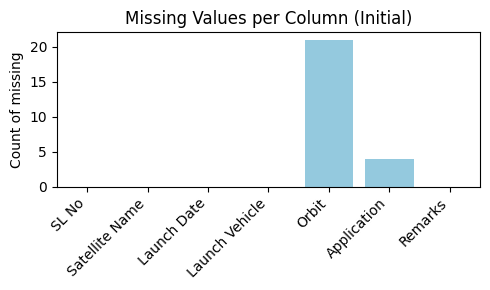

In [88]:
# Visualize missing values (before cleaning)
initial_missing = pd.read_csv('/content/ISRO_Satellite_List.csv', encoding='latin1').isnull().sum()
plt.figure(figsize=(5,3))
sns.barplot(x=initial_missing.index, y=initial_missing.values, color='skyblue')
plt.title("Missing Values per Column (Initial)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count of missing")
plt.xlabel("")
plt.tight_layout()
plt.show()


### METHOD 2: DATA VALIDATION

STEP 1: Load cleaned data

In [89]:
# Upload Load cleaned data
df = pd.read_csv('01_cleaned_data.csv')

print("Cleaned Data is Loaded Successfully 👍")

Cleaned Data is Loaded Successfully 👍


STEP 2: Check data types

In [90]:
# Ensure each column has an appropriate type in the cleaned data sheet
print("VALIDATING DATA TYPES:")
print("=" * 80)

print("\nCurrent data types:")
print(df.dtypes)

VALIDATING DATA TYPES:

Current data types:
sl_no              int64
satellite_name    object
launch_date       object
launch_vehicle    object
orbit             object
application       object
remarks           object
dtype: object


STEP 3: Range and domain checks

In [91]:
valid_dates = pd.to_datetime(df['launch_date'], format='%d-%b-%y', errors='coerce')
invalid_dates = valid_dates.isnull().sum()
print(f"Invalid dates parsed: {invalid_dates}")


Invalid dates parsed: 0


STEP 4: Mandatory Field Checks

In [92]:
# Checking the Mandatory Field
mandatory = ['satellite_name', 'launch_date']
for col in mandatory:
    missing = df[col].isnull().sum()
    print(f"{col}: {missing} missing values")


satellite_name: 0 missing values
launch_date: 0 missing values


STEP 5: Unique ID Check

In [93]:
# Checking for the Unique ID
total = len(df); unique = df['sl_no'].nunique()
print(f"SL No unique: {unique} out of {total} records")


SL No unique: 130 out of 130 records


STEP 6: Statistical summary

In [94]:
# Summaries/Describing the full datasets into the various factors like Max. Min. Values, Standard values etc.
print("STATISTICAL SUMMARY:")
print("=" * 80)

print("\nNumeric columns summary:")
print(df.describe(include='all'))


STATISTICAL SUMMARY:

Numeric columns summary:
             sl_no satellite_name launch_date           launch_vehicle  \
count   130.000000            130         130                      130   
unique         NaN            128         117                      114   
top            NaN        Thybolt   26-Nov-22  PSLV-C54/EOS-06 Mission   
freq           NaN              2           5                        5   
mean     65.500000            NaN         NaN                      NaN   
std      37.671829            NaN         NaN                      NaN   
min       1.000000            NaN         NaN                      NaN   
25%      33.250000            NaN         NaN                      NaN   
50%      65.500000            NaN         NaN                      NaN   
75%      97.750000            NaN         NaN                      NaN   
max     130.000000            NaN         NaN                      NaN   

                             orbit    application            rem

In [95]:
df

,sl_no,satellite_name,launch_date,launch_vehicle,orbit,application,remarks
0,130,NISAR(NASA-ISRO),30-Jul-25,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful
1,129,EOS-09,18-May-25,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful
2,128,NVS-02(NavIC Series),29-Jan-25,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful
3,127,"SPADEX, POEM-4",30-Dec-25,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful
4,126,Proba-3 (ESA),05-Dec-24,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful
...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,31-May-81,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful
126,4,Rohini Satellite RS-1,18-Jul-80,SLV-3E2,Unknown,Unknown,Launch successful
127,3,Rohini Technology Payload (RTP),10-Aug-79,SLV-3E1,Unknown,Unknown,Launch unsuccessful
128,2,Bhaskara-I,07-Jun-79,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful


####Save validated data

In [96]:
# Concluded:
print("DATA VALIDATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('02_validated_data.csv', index=False)
print("✓ Validated data saved as 02_validated_data.csv")

DATA VALIDATION COMPLETE:
Final size: 130 rows × 7 columns
✓ Validated data saved as 02_validated_data.csv


###METHOD 3: DATA TRANSFORMATION

STEP 1: Data Type Conversion

In [97]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime

df = pd.read_csv('02_validated_data.csv')
# Parse Launch Date (e.g., "30-Jul-25" → 2025-07-30)
df['launch_date'] = pd.to_datetime(df['launch_date'], format='%d-%b-%y')
df['Year'] = df['launch_date'].dt.year
df['Month'] = df['launch_date'].dt.month_name().str[:3]  # e.g. "Jul"

print("For Example:")
print(df[['launch_date','Year','Month']].head(2))


For Example:
  launch_date  Year Month
0  2025-07-30  2025   Jul
1  2025-05-18  2025   May


In [98]:
df

,sl_no,satellite_name,launch_date,launch_vehicle,orbit,application,remarks,Year,Month
0,130,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful,2025,Jul
1,129,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful,2025,May
2,128,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful,2025,Jan
3,127,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful,2025,Dec
4,126,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful,2024,Dec
...,...,...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful,1981,May
126,4,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,Launch successful,1980,Jul
127,3,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,Launch unsuccessful,1979,Aug
128,2,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful,1979,Jun


STEP 2: Encoding categorical data (if needed)

In [99]:
# Suppose we want numeric codes for categories. For example, encode Orbit and Application as categorical types for later use.
df['orbit'] = df['orbit'].astype('category')
df['application'] = df['application'].astype('category')
print("orbit categories:", list(df['orbit'].cat.categories)[:5], "...")


orbit categories: ['GEO', 'GSO (Geosynchronous Orbit)', 'GTO (Geosynchronous Transfer Orbit)', 'HEO(High Elliptical Orbit)', 'LEO (Low Earth Orbit)'] ...


In [100]:
df

,sl_no,satellite_name,launch_date,launch_vehicle,orbit,application,remarks,Year,Month
0,130,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful,2025,Jul
1,129,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful,2025,May
2,128,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful,2025,Jan
3,127,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful,2025,Dec
4,126,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful,2024,Dec
...,...,...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful,1981,May
126,4,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,Launch successful,1980,Jul
127,3,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,Launch unsuccessful,1979,Aug
128,2,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful,1979,Jun


STEP 3: Feature engineering (enrichment overlap)

In [101]:
# Example: extract first token of Launch Vehicle as RocketFamily
df['Rocket Family'] = df['launch_vehicle'].str.split().str[0]
# Extract mission name (text after slash, if slash exists)
df['Mission'] = df['launch_vehicle'].str.split('/').str[-1].str.replace(' Mission','')
print(df[['launch_vehicle','Rocket Family','Mission']].head(3))


            launch_vehicle    Rocket Family Mission
0   GSLV-F16/NISAR Mission   GSLV-F16/NISAR   NISAR
1  PSLV-C61/EOS-09 Mission  PSLV-C61/EOS-09  EOS-09
2  GSLV-F15/NVS-02 Mission  GSLV-F15/NVS-02  NVS-02


In [102]:
df

,sl_no,satellite_name,launch_date,launch_vehicle,orbit,application,remarks,Year,Month,Rocket Family,Mission
0,130,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),Launch successful,2025,Jul,GSLV-F16/NISAR,NISAR
1,129,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,Launch successful,2025,May,PSLV-C61/EOS-09,EOS-09
2,128,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,Launch successful,2025,Jan,GSLV-F15/NVS-02,NVS-02
3,127,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,Launch successful,2025,Dec,"PSLV-C60,SPADEX,POEM-4","PSLV-C60,SPADEX,POEM-4"
4,126,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),Launch successful,2024,Dec,PSLV-C59/Proba-3,Proba-3
...,...,...,...,...,...,...,...,...,...,...,...
125,5,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,Launch successful,1981,May,SLV-3D1,SLV-3D1
126,4,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,Launch successful,1980,Jul,SLV-3E2,SLV-3E2
127,3,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,Launch unsuccessful,1979,Aug,SLV-3E1,SLV-3E1
128,2,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",Launch successful,1979,Jun,C-1Intercosmos,C-1Intercosmos


####Save transformed data

In [103]:
# Concluded:
print("DATA TRANSFORMATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('03_transformed_data.csv', index=False)
print("✓ Transformed data saved as 03_transformed_data.csv")


DATA TRANSFORMATION COMPLETE:
Final size: 130 rows × 11 columns
✓ Transformed data saved as 03_transformed_data.csv


Visualization: The number of satellites launched per year to see trends. The figure below shows, for example, how launch counts rise over time (especially recent years).

/tmp/ipython-input-1341474288.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='viridis')


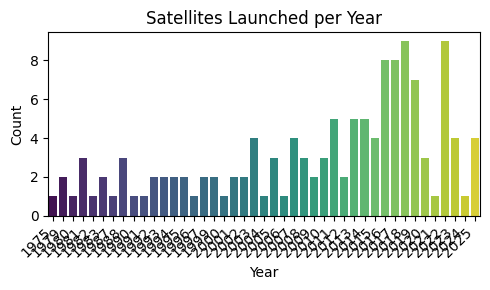

In [104]:
#Figure: Bar chart of satellite launches per year (derived from Year column).

plt.figure(figsize=(5,3))
sns.countplot(x='Year', data=df, palette='viridis')
plt.title("Satellites Launched per Year")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Count")
plt.xlabel("Year")
plt.tight_layout()
plt.show()


### METHOD 4: DATA FILTERING

STEP 1: Remove Unnecessary Columns

In [105]:
# Upload Load Transformed data
df = pd.read_csv('03_transformed_data.csv')

df = df.drop(columns=['remarks','sl_no'], errors='ignore')
print("Remaining columns:", list(df.columns))


Remaining columns: ['satellite_name', 'launch_date', 'launch_vehicle', 'orbit', 'application', 'Year', 'Month', 'Rocket Family', 'Mission']


In [106]:
df

,satellite_name,launch_date,launch_vehicle,orbit,application,Year,Month,Rocket Family,Mission
0,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),2025,Jul,GSLV-F16/NISAR,NISAR
1,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,2025,May,PSLV-C61/EOS-09,EOS-09
2,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,2025,Jan,GSLV-F15/NVS-02,NVS-02
3,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,2025,Dec,"PSLV-C60,SPADEX,POEM-4","PSLV-C60,SPADEX,POEM-4"
4,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),2024,Dec,PSLV-C59/Proba-3,Proba-3
...,...,...,...,...,...,...,...,...,...
125,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,1981,May,SLV-3D1,SLV-3D1
126,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,1980,Jul,SLV-3E2,SLV-3E2
127,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,1979,Aug,SLV-3E1,SLV-3E1
128,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",1979,Jun,C-1Intercosmos,C-1Intercosmos


STEP 2: Filter by criteria

In [107]:
'''
Examples:
-Remove future missions beyond 2025 (if focusing on historical data).
-Exclude any rows that are test entries or unlaunched.
'''
# Example: keep only satellites with Launch Date ≤ end of 2025
df['launch_date'] = pd.to_datetime(df['launch_date'], errors='coerce')
df = df[df['launch_date'] <= pd.Timestamp('2025-12-31')]
print(f"Filtered to {len(df)} records up to 2025")


Filtered to 130 records up to 2025


In [108]:
df

,satellite_name,launch_date,launch_vehicle,orbit,application,Year,Month,Rocket Family,Mission
0,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),2025,Jul,GSLV-F16/NISAR,NISAR
1,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,2025,May,PSLV-C61/EOS-09,EOS-09
2,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,2025,Jan,GSLV-F15/NVS-02,NVS-02
3,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,2025,Dec,"PSLV-C60,SPADEX,POEM-4","PSLV-C60,SPADEX,POEM-4"
4,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),2024,Dec,PSLV-C59/Proba-3,Proba-3
...,...,...,...,...,...,...,...,...,...
125,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,1981,May,SLV-3D1,SLV-3D1
126,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,1980,Jul,SLV-3E2,SLV-3E2
127,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,1979,Aug,SLV-3E1,SLV-3E1
128,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",1979,Jun,C-1Intercosmos,C-1Intercosmos


STEP 3: Temporal filtering:

If needed, we might keep data from a specific time window (e.g., last 10 years). This is optional.

####Save filtered data

In [109]:
# Concluded:
print("DATA FILERATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('04_filtered_data.csv', index=False)
print("✓ Filtered data saved as 04_filtered_data.csv")


DATA FILERATION COMPLETE:
Final size: 130 rows × 9 columns
✓ Filtered data saved as 04_filtered_data.csv


Visualization: A pie or bar plot of the main Orbit types (e.g. LEO vs GTO vs SSO) after filtering could show distribution. For brevity, we illustrate one: distribution of satellite application categories.

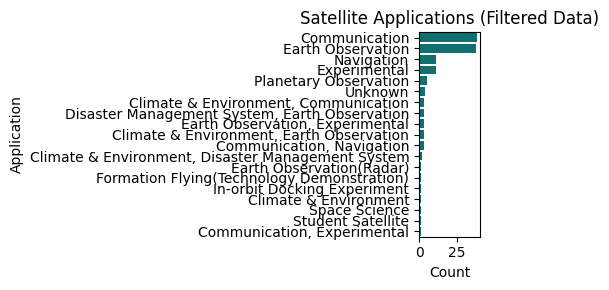

In [110]:
plt.figure(figsize=(5,3))
sns.countplot(y='application', data=df, order=df['application'].value_counts().index, color='teal')
plt.title("Satellite Applications (Filtered Data)")
plt.xlabel("Count")
plt.ylabel("Application")
plt.tight_layout()
plt.show()


###METHOD 5: DATA ENRICHMENT

STEP 1: Derive new features

In [111]:
'''
- We already added Year, Month, Rocket Family, and Mission. We can add more:
- Orbit Category: Simplify Orbit (e.g. “LEO”, “GTO”, “SSO”) by extracting abbreviations.
- Satellite Era: A flag for new/old (e.g. before/after 2000).
'''

df = pd.read_csv('04_filtered_data.csv')

# Example: extract acronym from Orbit (take first word or acronym)
df['Orbit Cat'] = df['orbit'].str.extract(r'^([A-Za-z]+)')
df['Recent Launch'] = (df['Year'] >= 2015).astype(int)
print(df[['satellite_name','orbit','Orbit Cat','Year','Recent Launch']].head(3))


         satellite_name                                orbit Orbit Cat  Year  \
0      NISAR(NASA-ISRO)          SSO (Sun Synchronous Orbit)       SSO  2025   
1                EOS-09          SSO (Sun Synchronous Orbit)       SSO  2025   
2  NVS-02(NavIC Series)  GTO (Geosynchronous Transfer Orbit)       GTO  2025   

   Recent Launch  
0              1  
1              1  
2              1  


In [112]:
df

,satellite_name,launch_date,launch_vehicle,orbit,application,Year,Month,Rocket Family,Mission,Orbit Cat,Recent Launch
0,NISAR(NASA-ISRO),2025-07-30,GSLV-F16/NISAR Mission,SSO (Sun Synchronous Orbit),Earth Observation(Radar),2025,Jul,GSLV-F16/NISAR,NISAR,SSO,1
1,EOS-09,2025-05-18,PSLV-C61/EOS-09 Mission,SSO (Sun Synchronous Orbit),Earth Observation,2025,May,PSLV-C61/EOS-09,EOS-09,SSO,1
2,NVS-02(NavIC Series),2025-01-29,GSLV-F15/NVS-02 Mission,GTO (Geosynchronous Transfer Orbit),Navigation,2025,Jan,GSLV-F15/NVS-02,NVS-02,GTO,1
3,"SPADEX, POEM-4",2025-12-30,"PSLV-C60,SPADEX,POEM-4 Mission",LEO (Low Earth Orbit),In-orbit Docking Experiment,2025,Dec,"PSLV-C60,SPADEX,POEM-4","PSLV-C60,SPADEX,POEM-4",LEO,1
4,Proba-3 (ESA),2024-12-05,PSLV-C59/Proba-3 Mission,HEO(High Elliptical Orbit),Formation Flying(Technology Demonstration),2024,Dec,PSLV-C59/Proba-3,Proba-3,HEO,1
...,...,...,...,...,...,...,...,...,...,...,...
125,Rohini Satellite RS-D1,1981-05-31,SLV-3D1,LEO (Low Earth Orbit),Earth Observation,1981,May,SLV-3D1,SLV-3D1,LEO,0
126,Rohini Satellite RS-1,1980-07-18,SLV-3E2,Unknown,Unknown,1980,Jul,SLV-3E2,SLV-3E2,Unknown,0
127,Rohini Technology Payload (RTP),1979-08-10,SLV-3E1,Unknown,Unknown,1979,Aug,SLV-3E1,SLV-3E1,Unknown,0
128,Bhaskara-I,1979-06-07,C-1Intercosmos,LEO (Low Earth Orbit),"Earth Observation, Experimental",1979,Jun,C-1Intercosmos,C-1Intercosmos,LEO,0


STEP 2: Fill missing enrichment: If any new field has missing values (unlikely here), fill appropriately.

####Save enriched data

In [113]:
# Concluded:
print("DATA ENRICHMENT COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('05_enriched_data.csv', index=False)
print("✓ Enriched data saved as 05_enriched_data.csv")


DATA ENRICHMENT COMPLETE:
Final size: 130 rows × 11 columns
✓ Enriched data saved as 05_enriched_data.csv


Visualization: A scatter or bar plot of launches vs rocket family can help. For example, count of satellites by Rocket Family

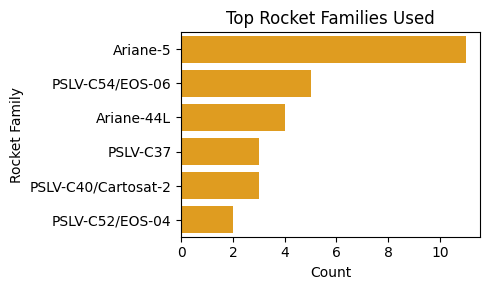

In [114]:
plt.figure(figsize=(5,3))
sns.countplot(y='Rocket Family', data=df, order=df['Rocket Family'].value_counts().head(6).index, color='orange')
plt.title("Top Rocket Families Used")
plt.xlabel("Count")
plt.ylabel("Rocket Family")
plt.tight_layout()
plt.show()


###METHOD 6: DATA DEDUPLICATION

STEP 1: Check again for duplicates

In [115]:
df = pd.read_csv('05_enriched_data.csv')
dup_sat = df.duplicated(subset=['satellite_name','launch_date'])
print(f"Exact duplicate names/dates: {dup_sat.sum()}")


Exact duplicate names/dates: 1


STEP 2: Drop duplicates if needed

In [116]:
df = df.drop_duplicates(subset=['satellite_name','launch_date'])
print(f"After deduplication: {len(df)} rows")


After deduplication: 129 rows


####Save deduplicated data

In [117]:
# Concluded:
print("DEDUPLICATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('06_deduplicated_data.csv', index=False)
print("✓ Deduplicated data saved as 06_deduplicated_data.csv")


DEDUPLICATION COMPLETE:
Final size: 129 rows × 11 columns
✓ Deduplicated data saved as 06_deduplicated_data.csv


###METHOD 7: DATA MASKING & SECURITY

###METHOD 8: DATA STANDARDIZATION

STEP 1: Standardize column names

In [118]:
# Convert to lowercase and replace spaces/special characters with underscores.
df = pd.read_csv('06_deduplicated_data.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')
print("Columns standardized:", list(df.columns))


Columns standardized: ['satellite_name', 'launch_date', 'launch_vehicle', 'orbit', 'application', 'year', 'month', 'rocket_family', 'mission', 'orbit_cat', 'recent_launch']


STEP 2: Format values consistently

In [119]:
df['application'] = df['application'].str.title()
df['orbit'] = df['orbit'].str.replace('HEO(', 'HEO (')
print("Sample orbit values:", df['orbit'].unique()[:3])


Sample orbit values: ['SSO (Sun Synchronous Orbit)' 'GTO (Geosynchronous Transfer Orbit)'
 'LEO (Low Earth Orbit)']


####Save standardized data

In [120]:
# Concluded:
print("DEDUPLICATION COMPLETE:")
print(f"Final size: {len(df)} rows × {len(df.columns)} columns")
print("=" * 80)

df.to_csv('07_standardized_data.csv', index=False)
print("✓ Standardized data saved as 07_standardized_data.csv")


DEDUPLICATION COMPLETE:
Final size: 129 rows × 11 columns
✓ Standardized data saved as 07_standardized_data.csv


###METHOD 9: EROOR HANDLING & LOGGING

In [121]:
import logging
logging.basicConfig(filename='preprocess.log', level=logging.INFO,
                    format='%(asctime)s %(levelname)s:%(message)s')

try:
    # Example operation: parse a date
    df['year'] = pd.to_datetime(df['launch_date'], format='%Y-%m-%d').dt.year
    logging.info("Date parsing successful")
except Exception as e:
    logging.error(f"Date parsing failed: {e}")

logging.info("Error handling and logging demonstration complete")


###METHOD 10: METADATA HANDLING

In [122]:
#Create a schema summary

df = pd.read_csv('07_standardized_data.csv')
metadata = {
    'source': 'ISRO Satellite Missions List (Kaggle)',
    'last_updated': pd.Timestamp('now').strftime('%Y-%m-%d'),
    'columns': {
        'satellite_name': 'Name of the satellite or mission',
        'launch_date': 'Date of launch (YYYY-MM-DD)',
        'launch_vehicle': 'Launch vehicle or rocket used',
        'orbit': 'Orbit type or altitude (e.g. LEO, GTO, SSO)',
        'application': 'Primary mission application (e.g. Earth Observation)',
        'year': 'Launch year (derived)',
        'month': 'Launch month (derived)',
        'rocket_family': 'Rocket family (derived)',
        'mission': 'Mission identifier (derived)'
    }
}
# Save as JSON metadata
import json
with open('metadata.json','w') as f:
    json.dump(metadata, f, indent=4)
logging.info("Metadata file created with column descriptions")


###METHOD 11: SAMPLING

STEP 1: Random sampling

In [123]:
#Pick a random fraction or number of rows. Useful for quick testing or training.
df = pd.read_csv('07_standardized_data.csv')

random_sample = df.sample(frac=0.1, random_state=42)  # 10% random sample
print(f"Random sample ({len(random_sample)} rows):")
display(random_sample.head(2))
random_sample.to_csv('08_random_sample.csv', index=False)


Random sample (13 rows):


,satellite_name,launch_date,launch_vehicle,orbit,application,year,month,rocket_family,mission,orbit_cat,recent_launch
55,GSAT-6,2015-08-27,GSLV-D6,GTO (Geosynchronous Transfer Orbit),Communication,2015,Aug,GSLV-D6,GSLV-D6,GTO,1
40,GSAT-19,2017-06-05,GSLV Mk III-D1/GSAT-19 Mission,GSO (Geosynchronous Orbit),Communication,2017,Jun,GSLV,GSAT-19,GSO,1


STEP 2: Time-based sampling



In [124]:
#Select data within a date range. For example, take all launches from 2010 onwards.
time_sample = df[df['year'] >= 2010]
print(f"Time-based sample (>=2010): {len(time_sample)} rows")
time_sample.to_csv('09_time_sample.csv', index=False)


Time-based sample (>=2010): 77 rows


##Preparing Data for Knowledge Graph Ingestion

STEP 1: Identify entities and relations:

For each satellite (entity), we might have relations like launched_by (the rocket), in_orbit (orbit), and has_application.

- Entities: satellite names, rockets, orbits, applications (all unique values).
- Relations: labels like "launched_by", "in_orbit", "applies_to"

STEP 2: Build triples

In [125]:
df = pd.read_csv('07_standardized_data.csv')
edges = []
for _, row in df.iterrows():
    sat = row['satellite_name']
    vehicle = row['launch_vehicle']
    orbit = row['orbit']
    app = row['application']
    # Add triples (satellite -> relation -> object)
    edges.append((sat, 'launched_by', vehicle))
    edges.append((sat, 'in_orbit', orbit))
    edges.append((sat, 'has_application', app))

edges_df = pd.DataFrame(edges, columns=['source','relation','target'])
edges_df.to_csv('graph_edges.csv', index=False)
print("Example graph edges (first 5):")
print(edges_df.head(5))


Example graph edges (first 5):
             source         relation                       target
0  NISAR(NASA-ISRO)      launched_by       GSLV-F16/NISAR Mission
1  NISAR(NASA-ISRO)         in_orbit  SSO (Sun Synchronous Orbit)
2  NISAR(NASA-ISRO)  has_application     Earth Observation(Radar)
3            EOS-09      launched_by      PSLV-C61/EOS-09 Mission
4            EOS-09         in_orbit  SSO (Sun Synchronous Orbit)


STEP 3: Prepare entity file (optional):

List each unique node and type (e.g. Satellite, Rocket, Orbit, Application).

In [126]:
entities = []
for name in pd.unique(edges_df['source']):
    entities.append((name, 'Satellite'))
for name in pd.unique(edges_df['target']):
    # Infer type by context: if appears as launch_vehicle or orbit or application
    if name in df['launch_vehicle'].values:
        etype = 'Rocket'
    elif name in df['orbit'].values:
        etype = 'Orbit'
    elif name in df['application'].values:
        etype = 'Application'
    else:
        etype = 'Entity'
    entities.append((name, etype))
entities_df = pd.DataFrame(entities, columns=['entity','type']).drop_duplicates()
entities_df.to_csv('graph_entities.csv', index=False)
print("Graph entity sample:", entities_df.head(3).to_dict())


Graph entity sample: {'entity': {0: 'NISAR(NASA-ISRO)', 1: 'EOS-09', 2: 'NVS-02(NavIC Series)'}, 'type': {0: 'Satellite', 1: 'Satellite', 2: 'Satellite'}}
